# Pauta actividad 4

**Importante**: Esta pauta cuenta con un análisis bastante exaustivo y supera con creces lo que se exigía para la actividad.

# Misión 1: conociendo e importando los datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

In [2]:
df_master = pd.read_csv("data.csv")
display(df_master.head())
display(df_master.describe())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1.0,5.0,NaN,5263,555.0,1.0,1.0,0,1.0
1,NaN,NaN,2015-07-31,6064,625.0,1.0,1.0,NaN,1.0
2,3.0,5.0,2015-07-31,8314,821.0,1.0,1.0,NaN,1.0
3,NaN,5.0,NaN,13995,1498.0,NaN,1.0,NaN,1.0
4,5.0,5.0,2015-07-31,4822,559.0,NaN,1.0,0,1.0


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,189361.000000,201401.000000,234150.000000,195385.000000,177926.000000,177732.000000,177426.000000
mean,558.425642,3.999955,5901.379671,626.977936,0.832408,0.404806,0.141276
std,321.841666,2.000309,3832.485440,452.442907,0.373505,0.490856,0.348307
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,3925.000000,413.000000,1.000000,0.000000,0.000000
50%,559.000000,4.000000,5930.000000,608.000000,1.000000,0.000000,0.000000
75%,837.000000,6.000000,8008.000000,824.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,5458.000000,1.000000,1.000000,1.000000


A partir de lo anterior se puede notar que:
1. Las variables Date y StateHoliday no aparecen en el describe, esto se debe a que no son variables numéricas.
2. La columna Sales tiene menos valores faltantes que el resto.
3. La desviación estándar de la variable Sales es alta en relación a su promedio, lo mismo ocurre en el caso de la variable Customers.
4. El 83.2% de las ventas se realizan con la tienda abierta, y el 40.4% con promociones.
5. El 14.1% de las ventas se realizan en feriados escolares.

Los estadísticos asociados a las variables Store y DayOfWeek no tienen mayor interpretación, dado que son categóricas.

La lógica indica que StateHoliday debiera ser una variable binaria o categórica. Analicemos los tipos de datos de cada columna.

In [3]:
df_master.dtypes

Store            float64
DayOfWeek        float64
Date              object
Sales              int64
Customers        float64
Open             float64
Promo            float64
StateHoliday      object
SchoolHoliday    float64
dtype: object

Efectivamente StateHoliday no es una variable binaria como dice la lógca. A continuación se muestran los valores que toman las distintas columnas y la cantidad de apariciones

In [4]:
for columna in df_master.columns:
    print("\n\nColumn name: ",columna,"\nValue\t# Registers")
    display(df_master[columna].value_counts())



Column name:  Store 
Value	# Registers


479.0    188
117.0    187
163.0    187
774.0    186
243.0    185
        ... 
286.0    154
58.0     153
78.0     153
917.0    152
32.0     148
Name: Store, Length: 1115, dtype: int64



Column name:  DayOfWeek 
Value	# Registers


1.0    28805
5.0    28805
7.0    28802
4.0    28788
2.0    28746
3.0    28741
6.0    28714
Name: DayOfWeek, dtype: int64



Column name:  Date 
Value	# Registers


2015-05-23    758
2015-02-20    756
2015-01-29    749
2015-05-29    748
2015-02-06    747
             ... 
2015-05-25    692
2015-02-01    690
2015-06-02    690
2015-03-29    685
2015-05-08    683
Name: Date, Length: 210, dtype: int64



Column name:  Sales 
Value	# Registers


0        39254
5674        60
6376        57
5818        57
5761        56
         ...  
15916        1
29650        1
22146        1
15195        1
21062        1
Name: Sales, Length: 16514, dtype: int64



Column name:  Customers 
Value	# Registers


0.0       32687
517.0       503
603.0       501
550.0       494
560.0       484
          ...  
1941.0        1
3899.0        1
3836.0        1
2708.0        1
3345.0        1
Name: Customers, Length: 3218, dtype: int64



Column name:  Open 
Value	# Registers


1.0    148107
0.0     29819
Name: Open, dtype: int64



Column name:  Promo 
Value	# Registers


0.0    105785
1.0     71947
Name: Promo, dtype: int64



Column name:  StateHoliday 
Value	# Registers


0    149125
a      2756
b      1466
Name: StateHoliday, dtype: int64



Column name:  SchoolHoliday 
Value	# Registers


0.0    152360
1.0     25066
Name: SchoolHoliday, dtype: int64

A partir de lo anterior, se puede concluir que:
1. La mayoría de las ventas ocurren cuando la tienda está abierta.
2. Un gran porcentaje de ventas se hacen durante promociones
3. La variable StateHoliday tiene un comportamiento binario, pero está representada como un objeto.

En base a esto se plantea el siguiente resumen:

| Variable      |	Tipo          | Descripción |
| :-:           | :-:           | :-:         | 
| Store         |    Categórica |  Identificador de la tienda       |
| DayOfWeek     |    Categórica |  Identificador del día de semana       |
| Date          |    Fecha      |  Fecha de la venta       |
| Sales         |    Entera     |  Ventas       |
| Customers     |    Entera     |  Clientes       |
| Open          |    Binaria    |  1 si la tienda estaba abierta, 0 si no       |
| Promo         |    Binaria    |  1 si habia promoción, 0 si no       |
| StateHoliday  |    Categórica    |  a o b si era feriado estatal, 0 si no       |
| SchoolHoliday |    Binaria    |  1 si era feriado escolar, 0 si no       |

# Visualización de las variables

## Categóricas

Text(0, 0.5, 'Cantidad de registros')

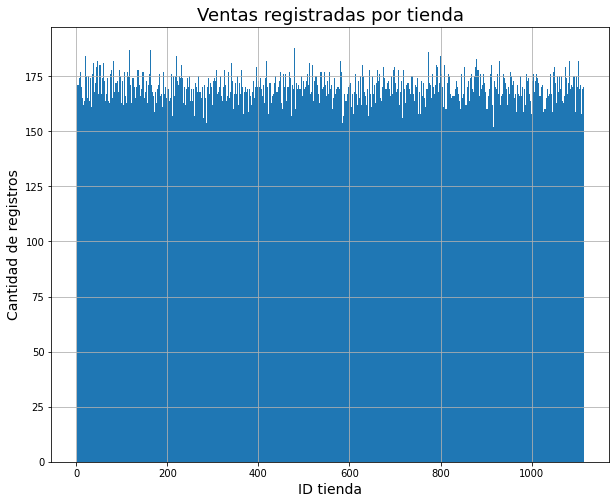

In [5]:
df_master["Store"].hist(bins=1115,figsize=(10,8))
plt.title("Ventas registradas por tienda",fontsize = 18)
plt.xlabel("ID tienda",fontsize = 14)
plt.ylabel("Cantidad de registros",fontsize = 14)

Los registros de ventas por tienda son bastante similares

Text(0, 0.5, 'Cantidad de registros')

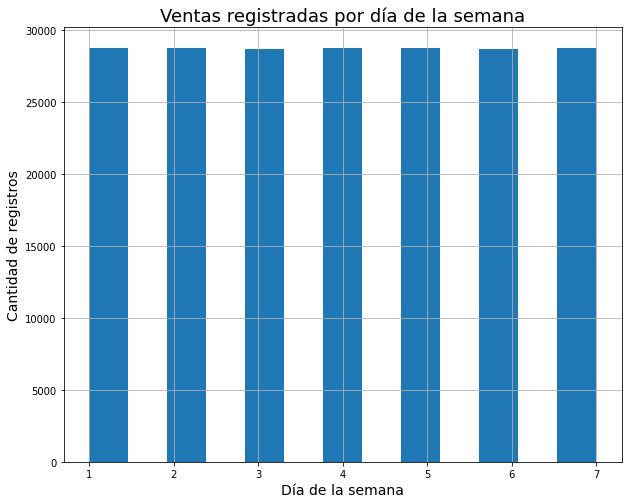

In [6]:
df_master["DayOfWeek"].hist(bins=13,figsize=(10,8))
plt.title("Ventas registradas por día de la semana",fontsize = 18)
plt.xlabel("Día de la semana",fontsize = 14)
plt.ylabel("Cantidad de registros",fontsize = 14)

Las ventas no cambian mucho según día de la semana

<AxesSubplot:>

Text(0, 0.5, 'Cantidad de registros')

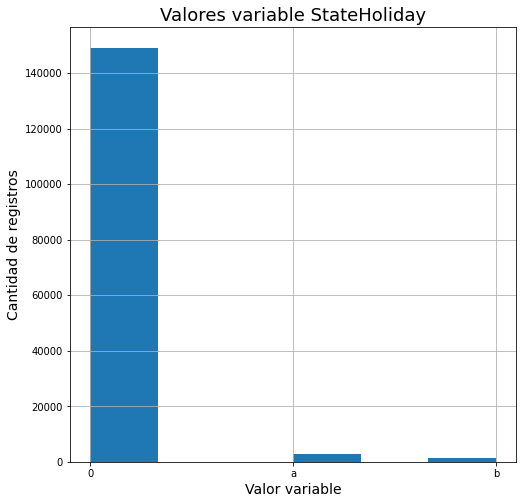

In [7]:
display(df_master["StateHoliday"].hist(bins=6,figsize=(8,8)))
plt.title("Valores variable StateHoliday",fontsize = 18)
plt.xlabel("Valor variable",fontsize = 14)
plt.ylabel("Cantidad de registros",fontsize = 14)

La mayor parte de las ventas se realiza cuando SateHoliday toma valor 0

## Enteras

Text(0, 0.5, 'Cantidad de registros')

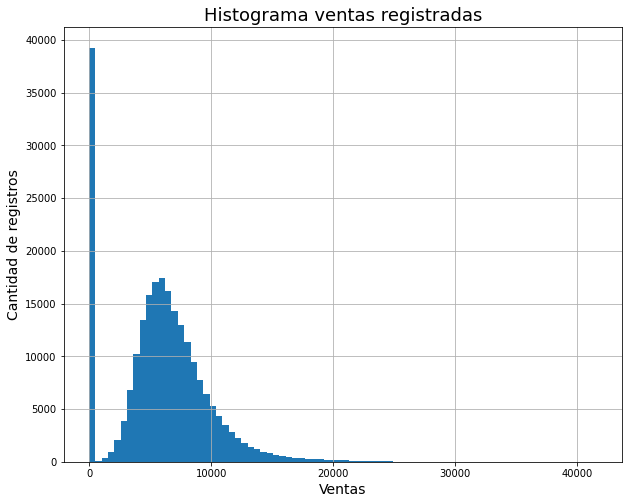

In [8]:
df_master["Sales"].hist(bins=80,figsize=(10,8))
plt.title("Histograma ventas registradas",fontsize = 18)
plt.xlabel("Ventas",fontsize = 14)
plt.ylabel("Cantidad de registros",fontsize = 14)

Text(0, 0.5, 'Ventas')

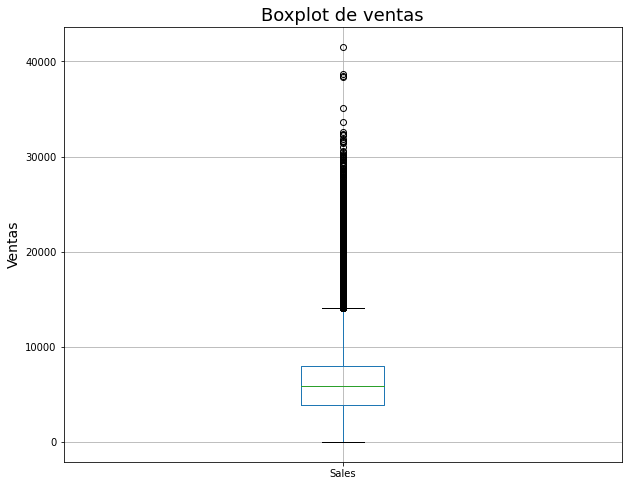

In [9]:
df_master.boxplot(column="Sales",figsize=(10,8))
plt.title("Boxplot de ventas",fontsize = 18)
plt.ylabel("Ventas",fontsize = 14)

Se puede notar que la tendencia es lognormal, y existen muchos registros sin ventas. Este comportamiento se traduce en ver muchos registros atípicos en el boxplot.

Text(0, 0.5, 'Cantidad de registros')

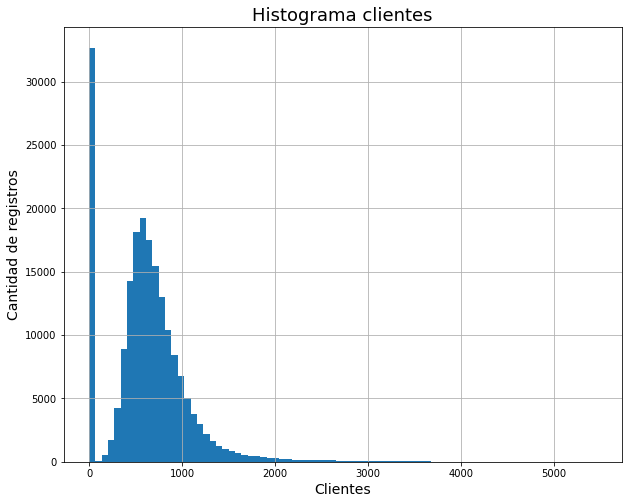

In [10]:
df_master["Customers"].hist(bins=80,figsize=(10,8))
plt.title("Histograma clientes",fontsize = 18)
plt.xlabel("Clientes",fontsize = 14)
plt.ylabel("Cantidad de registros",fontsize = 14)

Text(0, 0.5, 'Cantidad de registros')

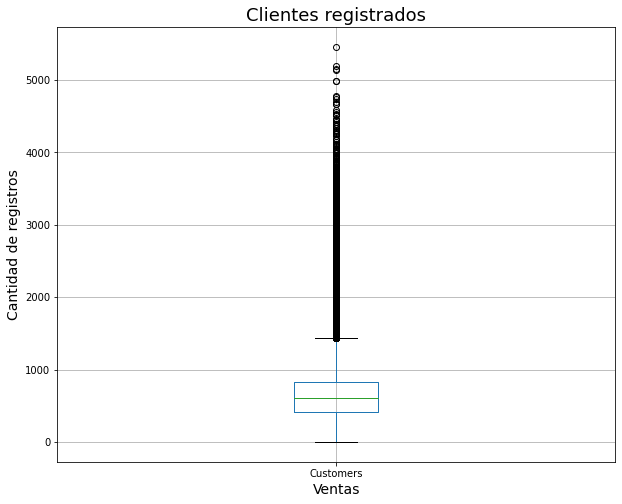

In [11]:
df_master.boxplot(column="Customers",figsize=(10,8))
plt.title("Clientes registrados",fontsize = 18)
plt.xlabel("Ventas",fontsize = 14)
plt.ylabel("Cantidad de registros",fontsize = 14)

El comportamiento es bastante similar al de las ventas pero en otra escala.

# Binarias

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

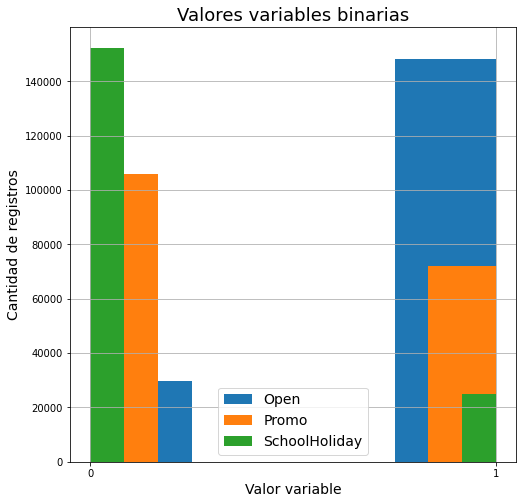

In [12]:
display(df_master["Open"].hist(bins=4))
display(df_master["Promo"].hist(bins=6))
display(df_master["SchoolHoliday"].hist(bins=12,figsize=(8,8)))
plt.title("Valores variables binarias",fontsize = 18)
plt.xticks([0,1], [0,1])
plt.xlabel("Valor variable",fontsize = 14)
plt.ylabel("Cantidad de registros",fontsize = 14)
plt.legend(["Open","Promo","SchoolHoliday"],fontsize = 14)

Gran cantidad de las ventas se realizan con la tienda abierta, un menor porcentaje en promociones y menor aún en feriados escolares.

# Datos faltantes

In [13]:
print("Datos faltantes por columna:")
display(df_master.shape[0] - df_master[~df_master["Store"].isna()].count())

Datos faltantes por columna:


Store             44789
DayOfWeek         71249
Date             111511
Sales             44789
Customers         76172
Open              90310
Promo             90504
StateHoliday     110214
SchoolHoliday     90776
dtype: int64

In [14]:
print(df_master.shape[0] / 1115)

210.0


Tenemos 1115 tiendas y sus registros durante 210 días, ordenados por par `(Date DESC, Store ASC)`.

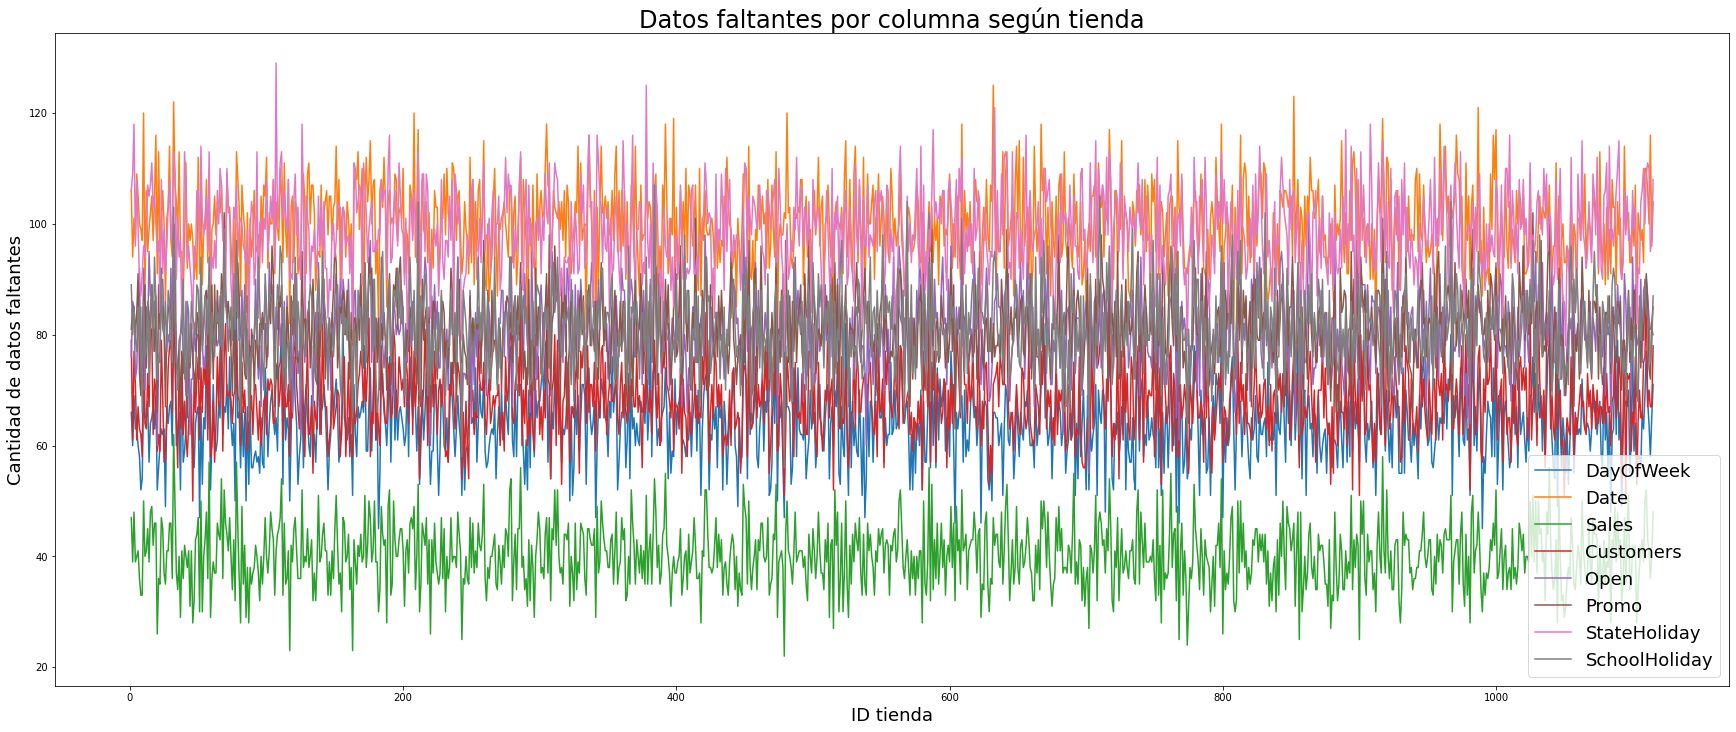

In [15]:
datos_faltantes = 210 - df_master.groupby("Store").count()
datos_faltantes.plot(figsize=(30,12))
plt.title("Datos faltantes por columna según tienda",fontsize = 24)
plt.xlabel("ID tienda",fontsize = 18)
plt.ylabel("Cantidad de datos faltantes",fontsize = 18)
plt.legend(fontsize = 18)

## Separamos los gráficos para visualizar mejor

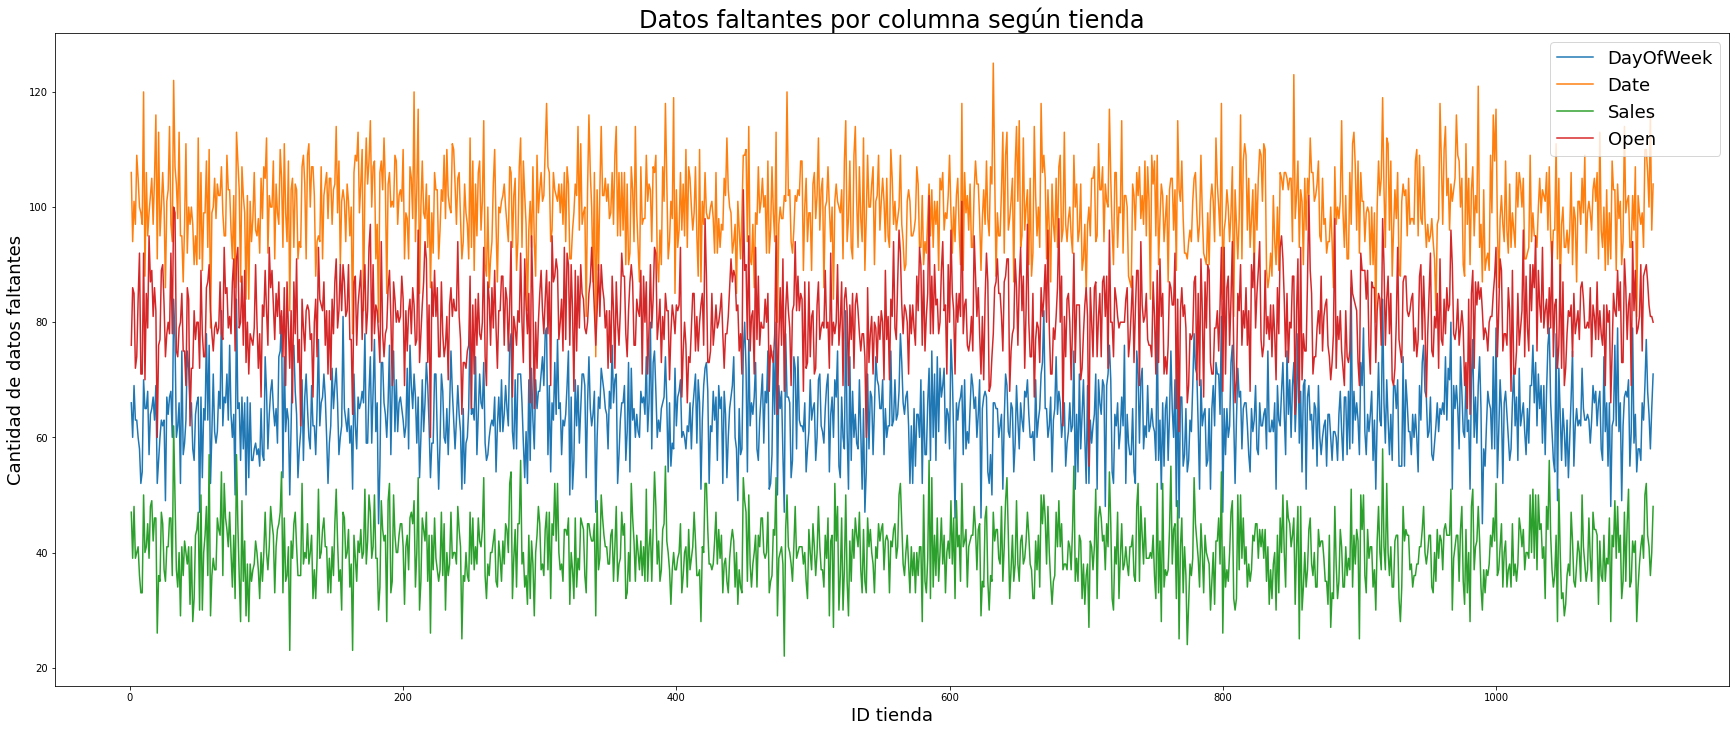

In [16]:
datos_faltantes = 210 - df_master[["Store","DayOfWeek","Date","Sales","Open"]].groupby("Store").count()
datos_faltantes.plot(figsize=(30,12))
plt.title("Datos faltantes por columna según tienda",fontsize = 24)
plt.xlabel("ID tienda",fontsize = 18)
plt.ylabel("Cantidad de datos faltantes",fontsize = 18)
plt.legend(fontsize = 18)

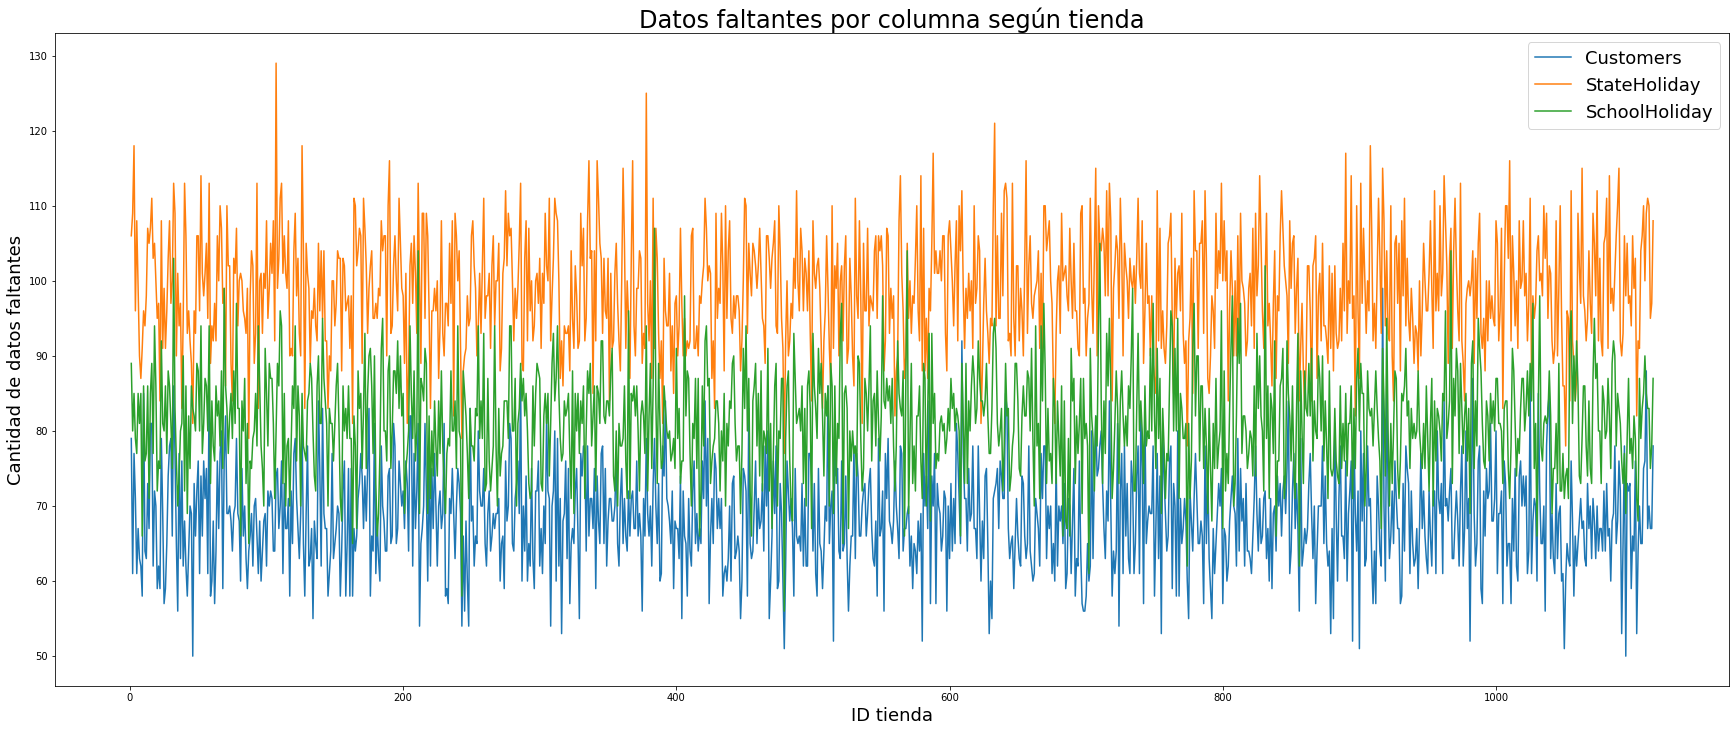

In [17]:
datos_faltantes = 210 - df_master[["Store","Customers","StateHoliday","SchoolHoliday"]].groupby("Store").count()
datos_faltantes.plot(figsize=(30,12))
plt.title("Datos faltantes por columna según tienda",fontsize = 24)
plt.xlabel("ID tienda",fontsize = 18)
plt.ylabel("Cantidad de datos faltantes",fontsize = 18)
plt.legend(fontsize = 18)

# Misión 2: limpieza y depuración

Previo a la limpieza haremos un breve análisis sobre los datos

In [18]:
df_master

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1.0,5.0,NaN,5263,555.0,1.0,1.0,0,1.0
1,NaN,NaN,2015-07-31,6064,625.0,1.0,1.0,NaN,1.0
2,3.0,5.0,2015-07-31,8314,821.0,1.0,1.0,NaN,1.0
3,NaN,5.0,NaN,13995,1498.0,NaN,1.0,NaN,1.0
4,5.0,5.0,2015-07-31,4822,559.0,NaN,1.0,0,1.0
...,...,...,...,...,...,...,...,...,...
234145,1111.0,6.0,2015-01-03,2514,211.0,1.0,0.0,NaN,NaN
234146,NaN,6.0,NaN,7734,672.0,NaN,0.0,0,0.0
234147,1113.0,NaN,2015-01-03,5659,549.0,1.0,0.0,0,0.0
234148,1114.0,6.0,2015-01-03,20267,NaN,1.0,0.0,0,0.0


Text(0, 0.5, 'Día de la semana')

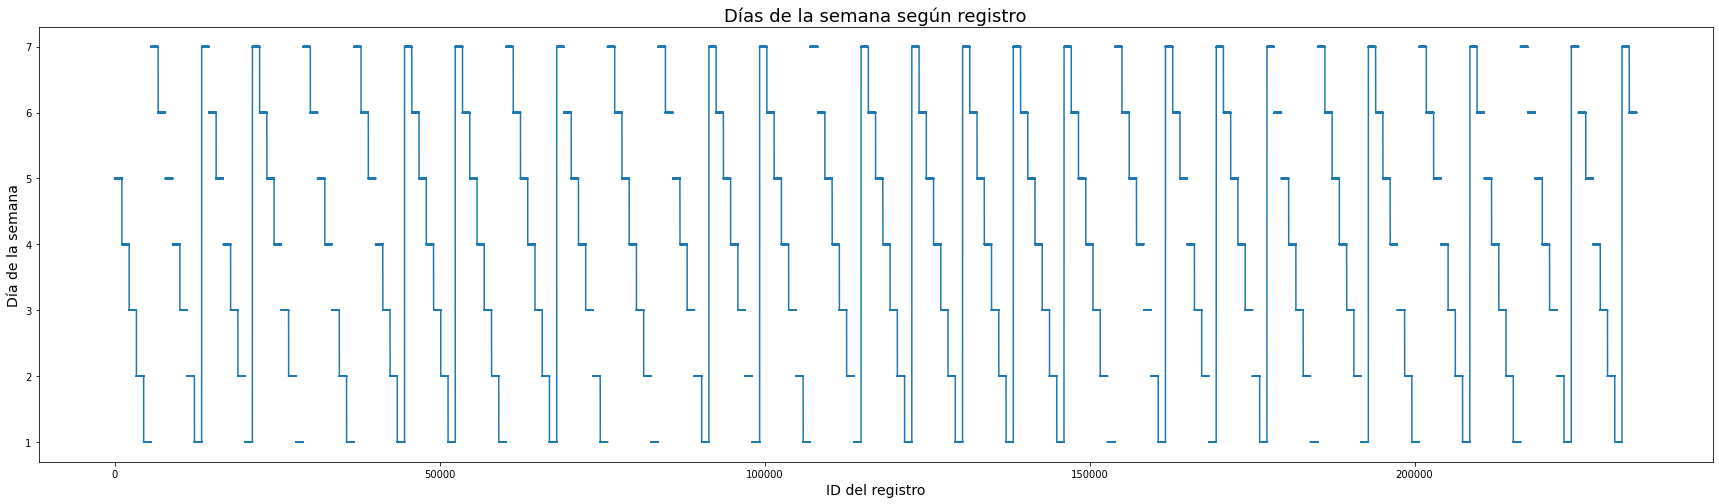

In [19]:
df_master["DayOfWeek"].plot(figsize=(30,8))
plt.title("Días de la semana según registro",fontsize = 18)
plt.xlabel("ID del registro",fontsize = 14)
plt.ylabel("Día de la semana",fontsize = 14)

Se puede notar un claro patrón en cuanto a los días de semana en la base de datos, esto es un indicador de que la base de datos muestra sus registros ordenados por fecha. Utilizaremos esta información para rellenar los datos faltantes que se pueda según corresponda

## Columna 'Store'

Acá tenemos las 1115 tiendas en bucle, ordenadas de menor a mayor, pero hay muchas que faltan. Completemos eso.

In [20]:
df_master["Store"] = df_master["Store"].fillna(pd.Series(list(range(1, 1116))*210))
# Rellena los ID faltantes de las tiendas (solo es válido porque estaban ordenados en bucle)

In [21]:
display(df_master.head())
display(df_master.describe())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1.0,5.0,NaN,5263,555.0,1.0,1.0,0,1.0
1,2.0,NaN,2015-07-31,6064,625.0,1.0,1.0,NaN,1.0
2,3.0,5.0,2015-07-31,8314,821.0,1.0,1.0,NaN,1.0
3,4.0,5.0,NaN,13995,1498.0,NaN,1.0,NaN,1.0
4,5.0,5.0,2015-07-31,4822,559.0,NaN,1.0,0,1.0


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,234150.000000,201401.000000,234150.000000,195385.000000,177926.000000,177732.000000,177426.000000
mean,558.000000,3.999955,5901.379671,626.977936,0.832408,0.404806,0.141276
std,321.873333,2.000309,3832.485440,452.442907,0.373505,0.490856,0.348307
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,279.000000,2.000000,3925.000000,413.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5930.000000,608.000000,1.000000,0.000000,0.000000
75%,837.000000,6.000000,8008.000000,824.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,5458.000000,1.000000,1.000000,1.000000


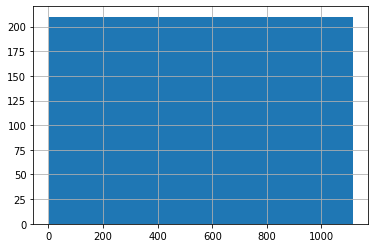

In [22]:
df_master["Store"].hist(bins=1115)
plt.show()

Efectivamente se rellenaron los datos

## Columna 'DayOfWeek'
La siguiente columna a revisar es 'DayOfWeek', que parte en 5 y toma valores del 1 al 7, en orden. Hay que completar esto.

In [23]:
display(df_master["DayOfWeek"].head())
print(210 / 7)
pivot = [5, 4, 3, 2, 1, 7, 6]
serie = []
for i in pivot:
    serie.extend([i] * 1115)
serie = serie * 30

serie = pd.Series(serie)

0    5.0
1    NaN
2    5.0
3    5.0
4    5.0
Name: DayOfWeek, dtype: float64

30.0


In [24]:
df_master["DayOfWeek"] = df_master["DayOfWeek"].fillna(serie)

In [25]:
display(df_master.head())
display(df_master.describe())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1.0,5.0,NaN,5263,555.0,1.0,1.0,0,1.0
1,2.0,5.0,2015-07-31,6064,625.0,1.0,1.0,NaN,1.0
2,3.0,5.0,2015-07-31,8314,821.0,1.0,1.0,NaN,1.0
3,4.0,5.0,NaN,13995,1498.0,NaN,1.0,NaN,1.0
4,5.0,5.0,2015-07-31,4822,559.0,NaN,1.0,0,1.0


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,234150.000000,234150.000000,234150.000000,195385.000000,177926.000000,177732.000000,177426.000000
mean,558.000000,4.000000,5901.379671,626.977936,0.832408,0.404806,0.141276
std,321.873333,2.000004,3832.485440,452.442907,0.373505,0.490856,0.348307
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,279.000000,2.000000,3925.000000,413.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5930.000000,608.000000,1.000000,0.000000,0.000000
75%,837.000000,6.000000,8008.000000,824.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,5458.000000,1.000000,1.000000,1.000000


Text(0, 0.5, 'Cantidad de datos faltantes')

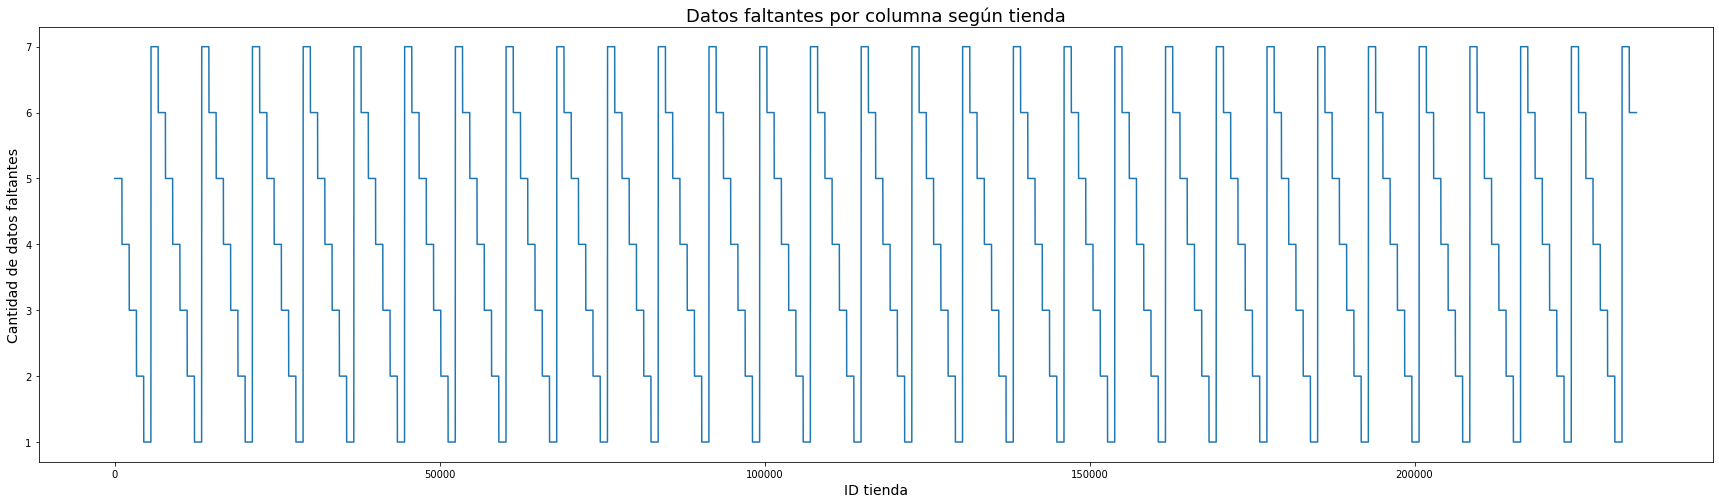

In [26]:
df_master["DayOfWeek"].plot(figsize=(30,8))
plt.title("Datos faltantes por columna según tienda",fontsize = 18)
plt.xlabel("ID tienda",fontsize = 14)
plt.ylabel("Cantidad de datos faltantes",fontsize = 14)

Esto permite verificar que se rellenaron los datos correctamente


## Columna 'Date'


In [27]:
df_master["Date"]

0                NaN
1         2015-07-31
2         2015-07-31
3                NaN
4         2015-07-31
             ...    
234145    2015-01-03
234146           NaN
234147    2015-01-03
234148    2015-01-03
234149           NaN
Name: Date, Length: 234150, dtype: object

En el caso de las fechas, parten de la más nueva a la más vieja, sin saltarse ningún día y en bloques de 1115 fechas iguales. Completemos con eso.

In [28]:
display(df_master["Date"].count())
display(df_master.loc[0:1115, ("Store", "Date",)])

151690

,Store,Date
0,1.0,NaN
1,2.0,2015-07-31
2,3.0,2015-07-31
3,4.0,NaN
4,5.0,2015-07-31
...,...,...
1111,1112.0,2015-07-31
1112,1113.0,NaN
1113,1114.0,2015-07-31
1114,1115.0,NaN


In [29]:
all_dates = set(df_master["Date"])
all_dates.remove(np.nan)
dates = sorted(all_dates, reverse=True)
# dates
serie = []
for date in dates:
    serie.extend([date] * 1115)
serie = pd.Series(serie)
df_master["Date"] = df_master["Date"].fillna(serie) # Rellena las fechas faltantes

In [30]:
display(df_master.head())
display(df_master.describe())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1.0,5.0,2015-07-31,5263,555.0,1.0,1.0,0,1.0
1,2.0,5.0,2015-07-31,6064,625.0,1.0,1.0,NaN,1.0
2,3.0,5.0,2015-07-31,8314,821.0,1.0,1.0,NaN,1.0
3,4.0,5.0,2015-07-31,13995,1498.0,NaN,1.0,NaN,1.0
4,5.0,5.0,2015-07-31,4822,559.0,NaN,1.0,0,1.0


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,234150.000000,234150.000000,234150.000000,195385.000000,177926.000000,177732.000000,177426.000000
mean,558.000000,4.000000,5901.379671,626.977936,0.832408,0.404806,0.141276
std,321.873333,2.000004,3832.485440,452.442907,0.373505,0.490856,0.348307
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,279.000000,2.000000,3925.000000,413.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5930.000000,608.000000,1.000000,0.000000,0.000000
75%,837.000000,6.000000,8008.000000,824.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,5458.000000,1.000000,1.000000,1.000000


In [31]:
display(df_master["Date"].count())
display(df_master.loc[0:1115, ("Store", "Date",)])

234150

,Store,Date
0,1.0,2015-07-31
1,2.0,2015-07-31
2,3.0,2015-07-31
3,4.0,2015-07-31
4,5.0,2015-07-31
...,...,...
1111,1112.0,2015-07-31
1112,1113.0,2015-07-31
1113,1114.0,2015-07-31
1114,1115.0,2015-07-31


Se rellenaron los datos correctamente

## Columna 'Open'
Acá usemos la lógica para completar: si un día tuvo ventas o clientes significa que estuvo abierta.

In [32]:
was_open = (df_master["Open"] == 1.0) | (df_master["Sales"] > 0) | (df_master["Customers"] > 0)
df_master["Open"] = was_open.astype(float)

In [33]:
df_master.head(20)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1.0,5.0,2015-07-31,5263,555.0,1.0,1.0,0,1.0
1,2.0,5.0,2015-07-31,6064,625.0,1.0,1.0,NaN,1.0
2,3.0,5.0,2015-07-31,8314,821.0,1.0,1.0,NaN,1.0
3,4.0,5.0,2015-07-31,13995,1498.0,1.0,1.0,NaN,1.0
4,5.0,5.0,2015-07-31,4822,559.0,1.0,1.0,0,1.0
5,6.0,5.0,2015-07-31,5651,589.0,1.0,1.0,NaN,1.0
6,7.0,5.0,2015-07-31,15344,1414.0,1.0,1.0,0,1.0
7,8.0,5.0,2015-07-31,8492,NaN,1.0,NaN,0,1.0
8,9.0,5.0,2015-07-31,8565,687.0,1.0,1.0,NaN,NaN
9,10.0,5.0,2015-07-31,7185,681.0,1.0,1.0,NaN,1.0


## Columna 'StateHoliday'
Acá tenemos 4 opciones:
- 0: none
- a: public holiday
- b: easter holiday (pascua)
- nan: dato no existe
Para cada fecha vamos a llenar los valores faltantes usando el criterio 'Most popular'. Básicamente, si la mayoría de tiendas dice que es feriado, entonces es feriado; pero antes tenemos que transformar la variable categórica en numérica.

In [34]:
transform = {"0": 0, "a": 1, "b": 2}
df_master["StateHoliday"] = df_master["StateHoliday"].map(lambda x: transform[x], na_action="ignore")

Text(0, 0.5, 'Promedio StateHoliday')

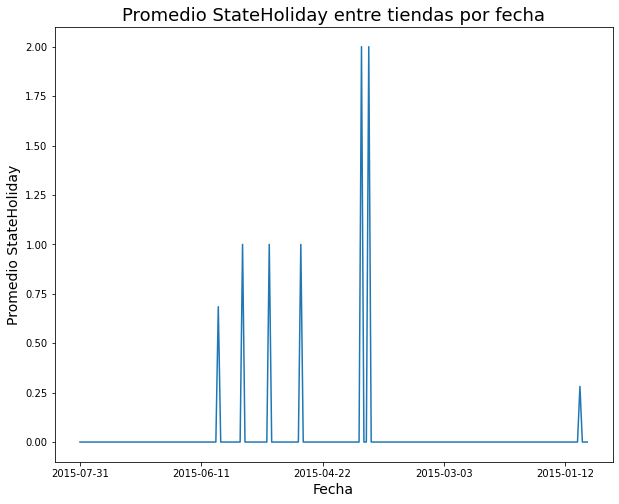

In [35]:
df_master.groupby("Date", sort=False).mean()["StateHoliday"].plot(figsize=(10,8))
plt.title("Promedio StateHoliday entre tiendas por fecha",fontsize = 18)
plt.xlabel("Fecha",fontsize = 14)
plt.ylabel("Promedio StateHoliday",fontsize = 14)

Se puede notar que en general los promedios son 0 1 o 2, existen solo 2 casos problemáticos en donde se aproximará al número más cercano

In [36]:
holiday_by_day = df_master.groupby("Date", sort=False).mean()["StateHoliday"].round()
series = []
for holiday_value in holiday_by_day:
    series.extend([holiday_value] * 1115)
series = pd.Series(series)
df_master["StateHoliday"] = df_master["StateHoliday"].fillna(series)

In [37]:
display(df_master.head())
display(df_master.describe())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1.0,5.0,2015-07-31,5263,555.0,1.0,1.0,0.0,1.0
1,2.0,5.0,2015-07-31,6064,625.0,1.0,1.0,0.0,1.0
2,3.0,5.0,2015-07-31,8314,821.0,1.0,1.0,0.0,1.0
3,4.0,5.0,2015-07-31,13995,1498.0,1.0,1.0,0.0,1.0
4,5.0,5.0,2015-07-31,4822,559.0,1.0,1.0,0.0,1.0


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,234150.000000,234150.000000,234150.000000,195385.000000,234150.000000,177732.000000,234150.000000,177426.000000
mean,558.000000,4.000000,5901.379671,626.977936,0.832368,0.404806,0.037993,0.141276
std,321.873333,2.000004,3832.485440,452.442907,0.373540,0.490856,0.235790,0.348307
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,279.000000,2.000000,3925.000000,413.000000,1.000000,0.000000,0.000000,0.000000
50%,558.000000,4.000000,5930.000000,608.000000,1.000000,0.000000,0.000000,0.000000
75%,837.000000,6.000000,8008.000000,824.000000,1.000000,1.000000,0.000000,0.000000
max,1115.000000,7.000000,41551.000000,5458.000000,1.000000,1.000000,2.000000,1.000000


## Columna 'SchoolHoliday'
Si un día es feriado del estado, entonces es feriado en la escuela.

In [38]:
is_school_holiday = (df_master["SchoolHoliday"] == 1.0) | (df_master["StateHoliday"] != 0.0)
df_master["SchoolHoliday"] = is_school_holiday.astype(float)

In [39]:
display(df_master.head())
display(df_master.describe())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1.0,5.0,2015-07-31,5263,555.0,1.0,1.0,0.0,1.0
1,2.0,5.0,2015-07-31,6064,625.0,1.0,1.0,0.0,1.0
2,3.0,5.0,2015-07-31,8314,821.0,1.0,1.0,0.0,1.0
3,4.0,5.0,2015-07-31,13995,1498.0,1.0,1.0,0.0,1.0
4,5.0,5.0,2015-07-31,4822,559.0,1.0,1.0,0.0,1.0


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,234150.000000,234150.000000,234150.000000,195385.000000,234150.000000,177732.000000,234150.000000,234150.000000
mean,558.000000,4.000000,5901.379671,626.977936,0.832368,0.404806,0.037993,0.127986
std,321.873333,2.000004,3832.485440,452.442907,0.373540,0.490856,0.235790,0.334075
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,279.000000,2.000000,3925.000000,413.000000,1.000000,0.000000,0.000000,0.000000
50%,558.000000,4.000000,5930.000000,608.000000,1.000000,0.000000,0.000000,0.000000
75%,837.000000,6.000000,8008.000000,824.000000,1.000000,1.000000,0.000000,0.000000
max,1115.000000,7.000000,41551.000000,5458.000000,1.000000,1.000000,2.000000,1.000000


## Columna 'Promo'
¿Podemos deducir si una tienda estaba de promoción en base a las demás? Veamos.

Date
2015-07-31    1.0
2015-07-30    1.0
2015-07-29    1.0
2015-07-28    1.0
2015-07-27    1.0
             ... 
2015-01-07    1.0
2015-01-06    1.0
2015-01-05    1.0
2015-01-04    0.0
2015-01-03    0.0
Name: Promo, Length: 210, dtype: float64

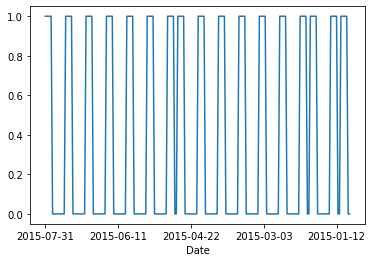

None

In [40]:
df_master.groupby("Date", sort=False).mean()["Promo"].plot() # Se calcula el promedio de todas las tiendas por fecha
display(df_master.groupby("Date", sort=False).mean()["Promo"])
display(plt.show())

Los datos muestran que Rossmann Store Sales tiende a hacer que todas sus tiendas estén de promoción al mismo tiempo. ¡Perfecto! Vamos a hacer lo mismo que con los feriados estatales.

In [41]:
promo_day = df_master.groupby("Date", sort=False).mean()["Promo"]
series = []
for day in promo_day:
    series.extend([day] * 1115)
series = pd.Series(series)
df_master["Promo"] = df_master["Promo"].fillna(series)

## Columna 'Customers'

A continuación usaremos la información de las columnas "Sales" y "Customers" para determinar si se debe mantener una fila o no.

- **0:** representa que el valor es cero.
- **1:** representa un valor mayor que 0.
- **nan**: representa que no hay valor.

\#|sales|customers|mantener fila|explicación
-|:-:|:-:|:-:|-
1|0|0|1|
2|0|1|1|podría ser que nadie compró nada?
3|0|nan|1|asumir customers = 0 suena razonable
4|1|0|0|
5|1|1|1|
6|1|nan|1|vamos a estimar los clientes a partir de las ventas



In [42]:
cond1 = (df_master["Sales"] == 0)  # de 1, 2 y 3.
cond2 = (df_master["Sales"] > 0) & (df_master["Customers"] > 0)  # de 5
cond3 = (df_master["Sales"] > 0) & (df_master["Customers"] == np.nan)  # de 6

df_master = df_master[cond1 | cond2 | cond3]  # eliminamos las filas que no queremos

Aquí vamos a estimar la cantidad de clientes usando el promedio de la relación `Customers:Sales`.

In [43]:
clientes_por_venta = (df_master["Customers"] / df_master["Sales"]).mean()
estimado_clientes = df_master["Sales"] * clientes_por_venta
df_master["Customers"] = df_master["Customers"].fillna(estimado_clientes)

<ipython-input-43-2a4d2b617bbb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_master["Customers"] = df_master["Customers"].fillna(estimado_clientes)


In [44]:
display(df_master.head())
display(df_master.describe())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1.0,5.0,2015-07-31,5263,555.0,1.0,1.0,0.0,1.0
1,2.0,5.0,2015-07-31,6064,625.0,1.0,1.0,0.0,1.0
2,3.0,5.0,2015-07-31,8314,821.0,1.0,1.0,0.0,1.0
3,4.0,5.0,2015-07-31,13995,1498.0,1.0,1.0,0.0,1.0
4,5.0,5.0,2015-07-31,4822,559.0,1.0,1.0,0.0,1.0


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,201952.000000,201952.000000,201952.000000,201952.000000,201952.000000,201952.000000,201952.000000,201952.000000
mean,558.122262,4.077558,5713.723969,606.590101,0.805642,0.393896,0.043738,0.128986
std,322.004526,2.030464,3914.173667,458.710326,0.395707,0.488613,0.252667,0.335185
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,279.000000,2.000000,3598.000000,383.000000,1.000000,0.000000,0.000000,0.000000
50%,558.000000,4.000000,5815.000000,595.000000,1.000000,0.000000,0.000000,0.000000
75%,837.000000,6.000000,7927.000000,814.250000,1.000000,1.000000,0.000000,0.000000
max,1115.000000,7.000000,41551.000000,5458.000000,1.000000,1.000000,2.000000,1.000000


## Análisis de outliers

No tiene sentido analizar outliers en las siguientes columnas:
1. Store (debido a que es un ID)
2. DayOfWeek (días de la semana se mueven de 1 a 7)
3. Open, Promo, SchoolHoliday (son binarias)
4. StateHoliday (es categórica)

Por lo tanto solo quedan 2 variables (Sales y Customers) que como ya vimos anteriormente tienen un comportamiento log normal.

Solo se analizará Customers debido a que en el enunciado se explicita que no se debe considerar Sales en este apartado.

Cantidad de registros sin ventas:  39254


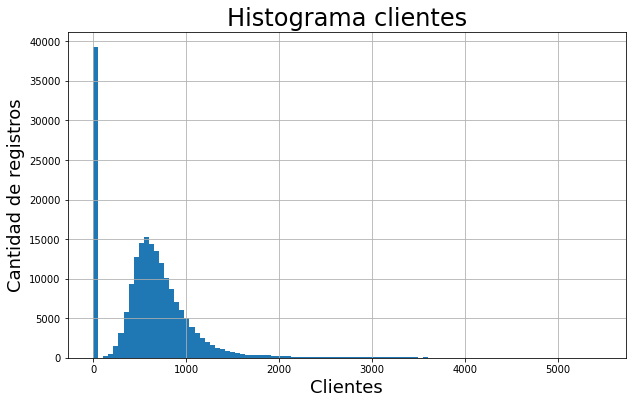

In [45]:
df_master["Customers"].hist(bins=100,figsize=(10,6))
plt.title("Histograma clientes",fontsize = 24)
plt.xlabel("Clientes",fontsize = 18)
plt.ylabel("Cantidad de registros",fontsize = 18)
print("Cantidad de registros sin ventas: ", df_master.value_counts("Customers", 0)[0])

<AxesSubplot:>

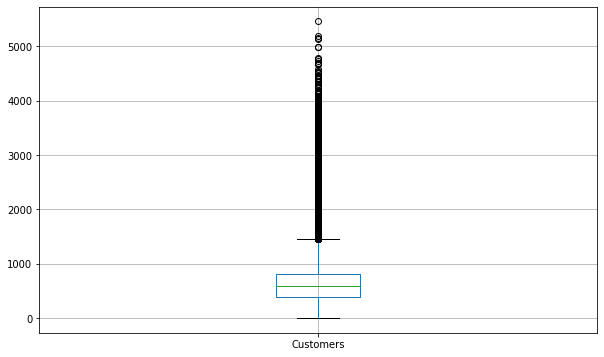

In [46]:
df_master.boxplot(column="Customers",figsize=(10,6))

Veamos su realción respecto a las ventas

Text(0, 0.5, 'Frecuencia')

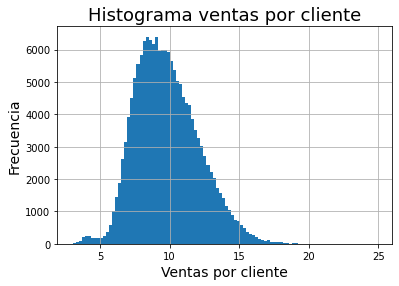

In [47]:
pd.DataFrame(df_master["Sales"] / df_master["Customers"]).hist(bins=100)
plt.title("Histograma ventas por cliente",fontsize = 18)
plt.xlabel("Ventas por cliente",fontsize = 14)
plt.ylabel("Frecuencia",fontsize = 14)

Text(0, 0.5, 'Ventas por cliente')

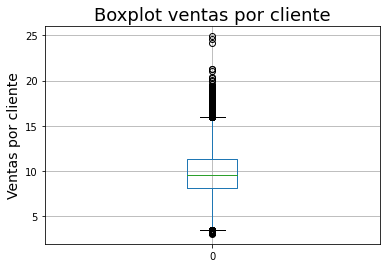

In [48]:
# ventas por cliente
pd.DataFrame(df_master["Sales"] / df_master["Customers"]).boxplot()
plt.title("Boxplot ventas por cliente",fontsize = 18)
plt.ylabel("Ventas por cliente",fontsize = 14)

Hay una tendencia lognormal, veámos como se comporta al aplicar logaritmo

C:\Users\Juaco\AppData\Roaming\Python\Python39\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: supplied range of [-inf, 10.634676867382668] is not finite

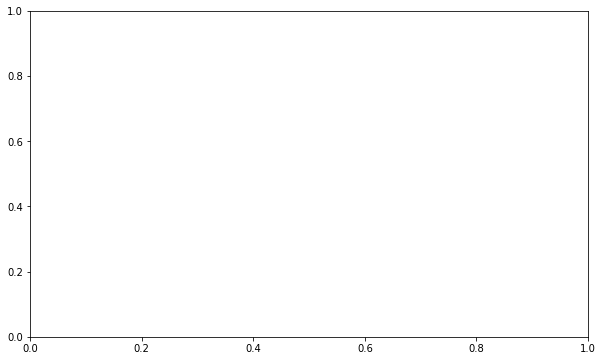

In [49]:
pd.DataFrame(np.log(df_master["Sales"])).hist(bins=100,figsize=(10,6))
plt.title("Histograma ventas por cliente en escala logarítmica",fontsize = 18)
plt.xlabel("Ventas por cliente",fontsize = 14)
plt.ylabel("Frecuencia",fontsize = 14)

Text(0, 0.5, 'Ventas por cliente')

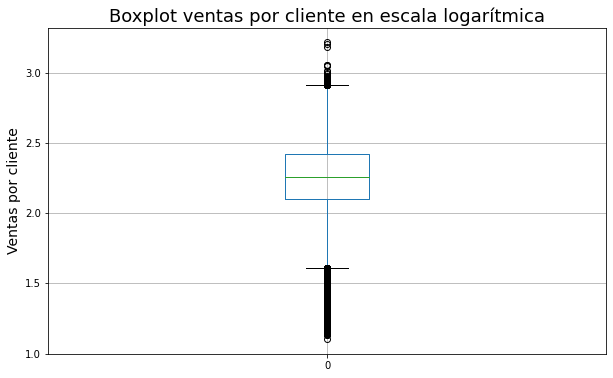

In [ ]:
# ventas por cliente en escala logarítmica
pd.DataFrame(np.log(df_master["Sales"] / df_master["Customers"])).boxplot(figsize=(10,6))
plt.title("Boxplot ventas por cliente en escala logarítmica",fontsize = 18)
plt.ylabel("Ventas por cliente",fontsize = 14)

Para corregir este comportamiento, apliquemos logaritmo sobre esta columna

In [ ]:
df_master["Customers_log"] = df_master.apply(lambda row: 0 if row["Customers"] == 0 else np.log(row["Customers"]),axis=1)
# Se excluyen los ceros porque se indefine el logaritmo

<ipython-input-59-c29e77b0b959>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_master["Customers_log"] = df_master.apply(lambda row: 0 if row["Customers"] == 0 else np.log(row["Customers"]),axis=1)


In [ ]:
df_master.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Customers_log
0,1.0,5.0,2015-07-31,5263,555.0,1.0,1.0,0.0,1.0,6.318968
1,2.0,5.0,2015-07-31,6064,625.0,1.0,1.0,0.0,1.0,6.437752
2,3.0,5.0,2015-07-31,8314,821.0,1.0,1.0,0.0,1.0,6.710523
3,4.0,5.0,2015-07-31,13995,1498.0,1.0,1.0,0.0,1.0,7.311886
4,5.0,5.0,2015-07-31,4822,559.0,1.0,1.0,0.0,1.0,6.326149


Text(0, 0.5, 'Cantidad de registros')

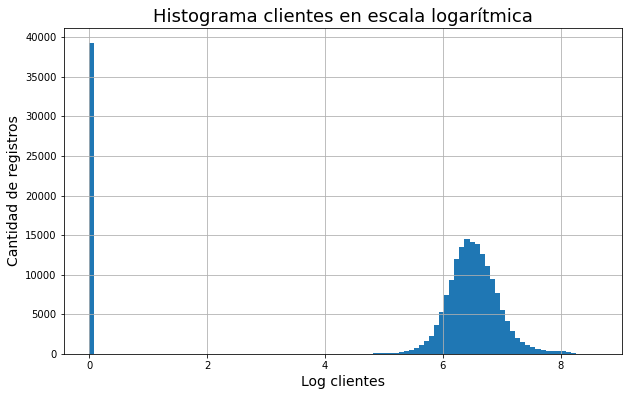

In [ ]:
df_master["Customers_log"].hist(bins=100,figsize=(10,6))
plt.title("Histograma clientes en escala logarítmica",fontsize = 18)
plt.xlabel("Log clientes",fontsize = 14)
plt.ylabel("Cantidad de registros",fontsize = 14)

# Misión 3: entrenamiento de modelos

Mis tres regresores son:
- Lineal
- SVM
- Red neuronal

## Preparando el entorno

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [ ]:
df_master.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Customers_log
0,1.0,5.0,2015-07-31,5263,555.0,1.0,1.0,0.0,1.0,6.318968
1,2.0,5.0,2015-07-31,6064,625.0,1.0,1.0,0.0,1.0,6.437752
2,3.0,5.0,2015-07-31,8314,821.0,1.0,1.0,0.0,1.0,6.710523
3,4.0,5.0,2015-07-31,13995,1498.0,1.0,1.0,0.0,1.0,7.311886
4,5.0,5.0,2015-07-31,4822,559.0,1.0,1.0,0.0,1.0,6.326149


Categorizar los valores de las columnas categóricas.

In [ ]:
label_encoder = LabelEncoder()
for col in ["Store", "DayOfWeek", "Date", "Open", "Promo", "StateHoliday", "SchoolHoliday"]:
    df_master[col] = label_encoder.fit_transform(df_master[col])

<ipython-input-64-6850f48168be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_master[col] = label_encoder.fit_transform(df_master[col])


In [ ]:
df_master.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Customers_log
0,0,4,209,5263,555.0,1,1,0,1,6.318968
1,1,4,209,6064,625.0,1,1,0,1,6.437752
2,2,4,209,8314,821.0,1,1,0,1,6.710523
3,3,4,209,13995,1498.0,1,1,0,1,7.311886
4,4,4,209,4822,559.0,1,1,0,1,6.326149


Normalizamos los valores de las columnas enteras (sin considerar al target, que en este caso es Sales).

Para normalizar la variable customers se requiere separar en train y test. Normalizar en base a todo el df no es correcto, porque los datos de test son desconocidos al momento de entrenar.

In [ ]:
def escalar(train, test, col): # Se ocupará para normalizar tanto con el tercio más reciente como con el tercio aleatorio
    scaler = StandardScaler()
    train[col] = scaler.fit_transform(train[col])  # la escala se ajusta sólo para train
    test[col] = scaler.transform(test[col])  # y luego se aplica para test, que es desconocido
    return train, test

## A: el tercio más reciente

In [ ]:
display(df_master.shape)
cut_33p = df_master.shape[0] // 3 # Para separar en entrenamiento y test

df = df_master.copy()  # copiamos el data frame para no seguir cambiando el original

df_test = df.loc[:cut_33p].copy() # tercio más reciente para test (esto es válido solo porque están ordenados)
df_train = df.loc[(cut_33p+1):].copy()

col = ["Customers_log"] # La feature a normalizar
df_train, df_test = escalar(df_train, df_test, col)

display(df_train.head())
display(df_test.head())

(201952, 10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Customers_log
67318,418,0,149,8516,1102.0,1,1,0,0,0.683139
67319,419,0,149,7372,538.0,1,1,0,0,0.414928
67320,420,0,149,11673,1089.0,1,1,0,0,0.678700
67321,421,0,149,5946,541.0,1,1,0,0,0.417009
67322,422,0,149,14740,2115.0,1,1,0,0,0.927000


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Customers_log
0,0,4,209,5263,555.0,1,1,0,1,0.426565
1,1,4,209,6064,625.0,1,1,0,1,0.470998
2,2,4,209,8314,821.0,1,1,0,1,0.573031
3,3,4,209,13995,1498.0,1,1,0,1,0.797978
4,4,4,209,4822,559.0,1,1,0,1,0.429252


In [ ]:
display(df_test.shape)
display(df_train.shape)

(57769, 10)

(144183, 10)

Definimos las features y el target

In [ ]:
features = ["Store", "DayOfWeek", "Date", "Customers_log", "Open", "Promo", "StateHoliday", "SchoolHoliday"]
target = "Sales"

In [ ]:
def train_and_test_model(model, train, test, *args, **kwargs):
    d = {}
    d["reg"] = model(*args, **kwargs)
    d["reg"].fit(train[features], train[target])
    d["predictions"] = d["reg"].predict(test[features])
    d["selfpredict"] = d["reg"].predict(train[features])
    d["mse"] = metrics.mean_squared_error(test[target], d["predictions"])
    print("El error cuadrático medio es:", d["mse"])
    return d

### Regresión lineal!

In [ ]:
lineal_1 = train_and_test_model(LinearRegression, df_train, df_test)

El error cuadrático medio es: 2386095.0796709694



### Red neuronal (tarda un poco, aprox 90 sec)

In [ ]:
mpl_1 = train_and_test_model(MLPRegressor, df_train, df_test, max_iter=1000)

El error cuadrático medio es: 2182379.7198413596


C:\Users\Juaco\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


### Árbol de decisión

In [ ]:
tree_1 = train_and_test_model(DecisionTreeRegressor, df_train, df_test)

El error cuadrático medio es: 2548050.2887881044


## B: tercio aleatorio

In [ ]:
df_train_r, df_test_r = train_test_split(df_master.copy(), test_size=1/3)  # separamos el data frame maestro

# tenemos que escalar de nuevo para este nuevo train/test
col = ["Customers_log"]
df_train_r, df_test_r = escalar(df_train_r, df_test_r, col)

print(len(df_train_r))
print(len(df_test_r))

134634
67318


### Regresión lineal! 2

In [ ]:
lineal_2 = train_and_test_model(LinearRegression, df_train_r, df_test_r)

El error cuadrático medio es: 2221572.297243099


### Red neuronal 2 (tarda un poco, aprox 90 sec)

In [ ]:
mpl_2 = train_and_test_model(MLPRegressor, df_train_r, df_test_r, max_iter=1000)

El error cuadrático medio es: 1874196.4549187457


### Árbol de decisión 2

In [ ]:
tree_2 = train_and_test_model(DecisionTreeRegressor, df_train_r, df_test_r)

El error cuadrático medio es: 1959871.2692593362


# Comentarios

Regresor|MSE reciente |MSE aleatorio
-|-|-
Lineal|2.386.095,07|2.221.572,29
Red neuronal|2.311.584,81|1.874.196,45
Árbol de decisión|2.548.050,28|1.959.871,26

* Nota: Los valores de los MSE pueden variar al ejecutar nuevamente, porque la muestra aleatoria cambia y también hay aleatoriedad en la red neuronal y el árbol de decisión, pero debieran ser similares.

En general la regresión lineal funciona peor que el resto, probablemente porque los datos no se comporten de forma lineal. Por otro lado, el modelo que mejor ajusta es la red neuronal, que es más compleja que los otros modelos utilizados, por esto mismo tarda más tiempo en ejecutarse.

Al comparar los rendimientos entre ambos conjuntos, se ve que de forma consistente la muestra aleatoria obtiene resultados ligeramente mejores (excepto para el arbol de decisión, donde son considerablemente mejores), esto indica que una muestra aleatoria permite predecir mejor a ocupar los datos del pasado para predecir el futuro, esto puede ser debido a que exista alguna tendencia temporal que no captura el modelo y está presente en los datos.

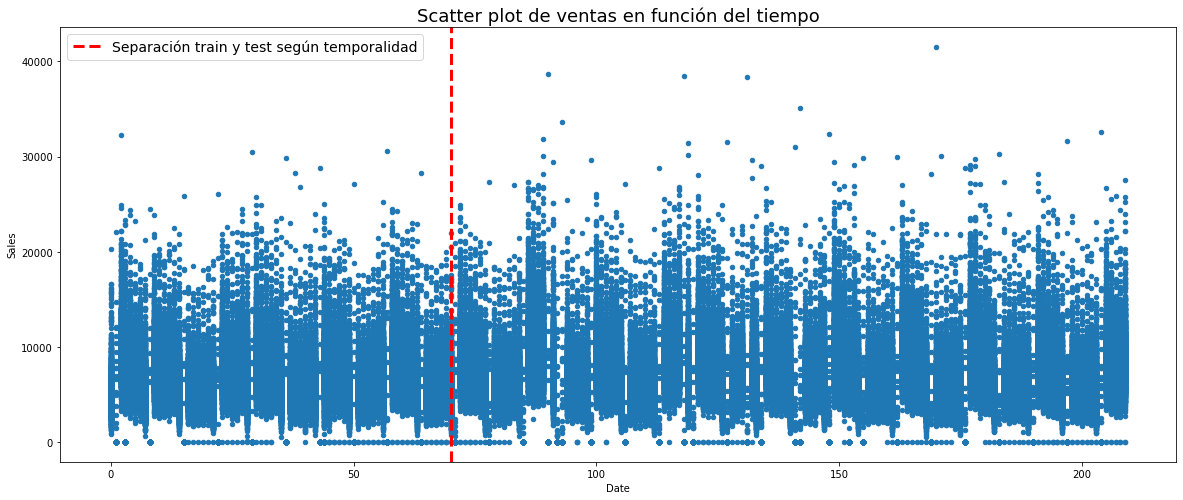

In [ ]:
ax = df_master.plot.scatter("Date", "Sales",figsize=(20,8))
ax.axvline(x=70, color="red", linestyle="dashed",linewidth = 3, label = "Separación train y test según temporalidad")
plt.title("Scatter plot de ventas en función del tiempo", fontsize = 18)
plt.legend(fontsize = 14)
plt.show()

([<matplotlib.axis.XTick at 0x7f6fbe8c73d0>,
 [Text(0, 0, '0'),
  Text(0, 0, '5000'),
  Text(0, 0, '10000'),
  Text(0, 0, '15000'),
  Text(0, 0, '20000'),
  Text(0, 0, '25000'),
  Text(0, 0, '30000'),
  Text(0, 0, '35000'),
  Text(0, 0, '40000')])

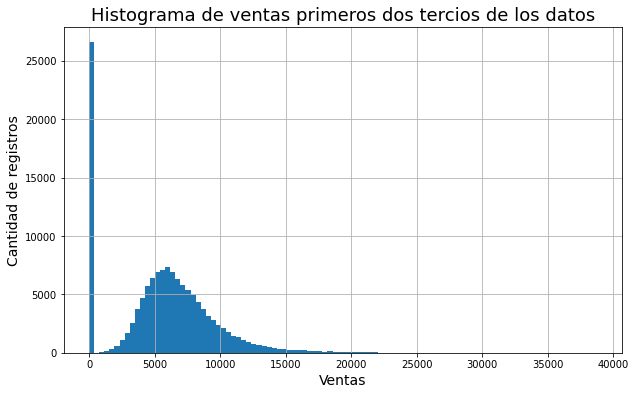

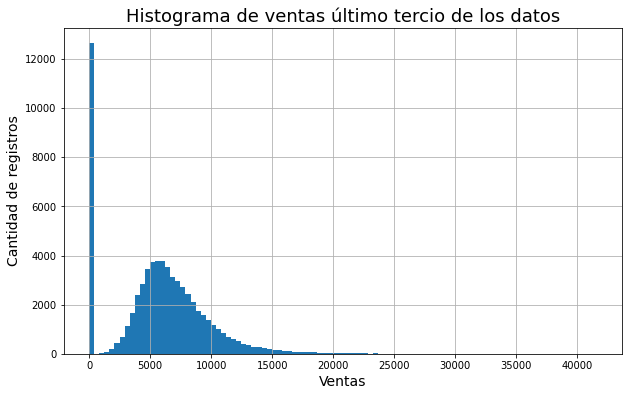

In [ ]:
df_master[df_master["Date"] <=140].hist("Sales",bins = 100,figsize=(10,6))
plt.title("Histograma de ventas primeros dos tercios de los datos", fontsize = 18)
plt.xlabel("Ventas", fontsize = 14)
plt.ylabel("Cantidad de registros", fontsize = 14)
plt.xticks([0,5000,10000,15000,20000,25000,30000,35000,40000], [0,5000,10000,15000,20000,25000,30000,35000,40000])

df_master[df_master["Date"] >140].hist("Sales",bins = 100,figsize=(10,6))
plt.title("Histograma de ventas último tercio de los datos", fontsize = 18)
plt.xlabel("Ventas", fontsize = 14)
plt.ylabel("Cantidad de registros", fontsize = 14)
plt.xticks([0,5000,10000,15000,20000,25000,30000,35000,40000], [0,5000,10000,15000,20000,25000,30000,35000,40000])

Se puede notar que efectivamente los datos tienen una ligera variación temporal, por lo que los modelos obtienen distintos resultados pero bastante similares. El enfoque de utilizar el pasado para predecir el futuro es muy útil frente a incertidumbre, ya que es un pronóstico.

## Análisis visual sobre los datos

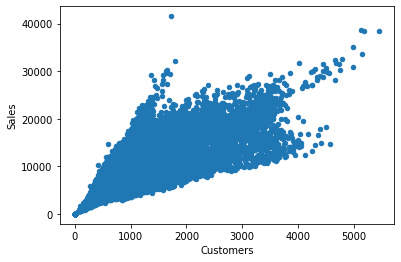

In [ ]:
df_master.plot.scatter("Customers", "Sales")
plt.show()

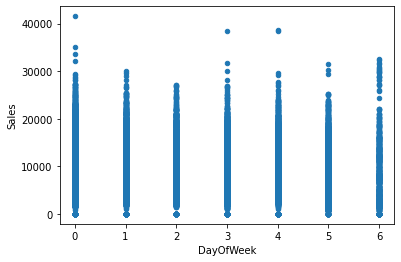

In [ ]:
df_master.plot.scatter("DayOfWeek", "Sales")
plt.show()

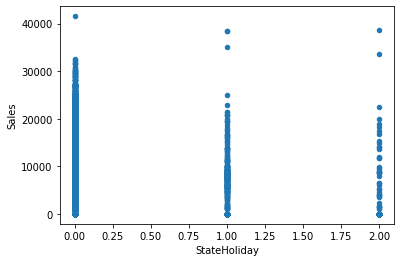

In [ ]:
df_master.plot.scatter("StateHoliday", "Sales")
plt.show()

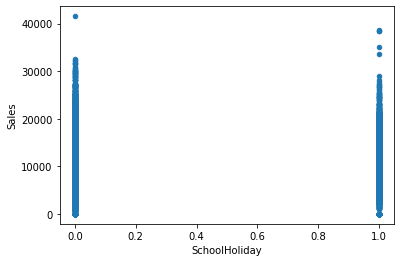

In [ ]:
df_master.plot.scatter("SchoolHoliday", "Sales")
plt.show()

Visto esto, es de esperar que modelos polinomiales tengan un mejor rendimiento respecto a uno lineal.

## ¿Overfitting o underfitting?

Los números son tan grandes que el MSE no nos dice mucho. Tenemos que recurrir a otra estrategia.

In [ ]:
def plot_var_and_predictions(model_returned, test, title, predictions="predictions", variable="Sales", use_exp=False):
    if use_exp:
        plt.plot(np.exp(test[variable]), np.exp(model_returned[predictions]), ".")
    else:
        plt.plot(test[variable], model_returned[predictions], ".")
    plt.ylabel("Predictions")
    plt.xlabel(variable)
    plt.title(title)
    plt.show()

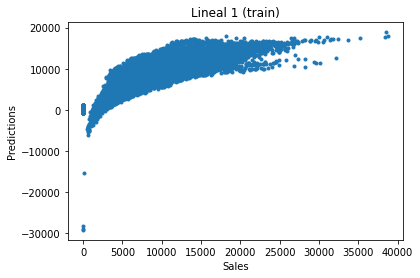

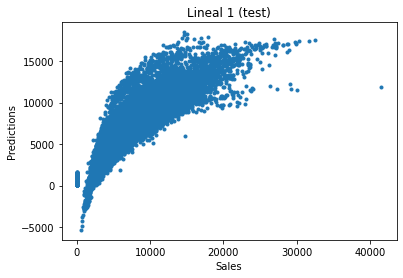

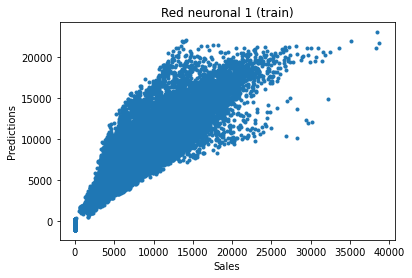

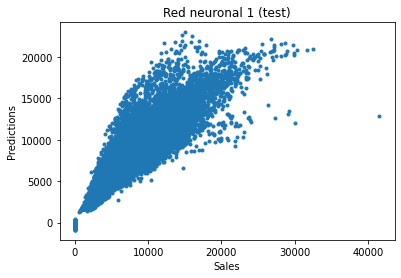

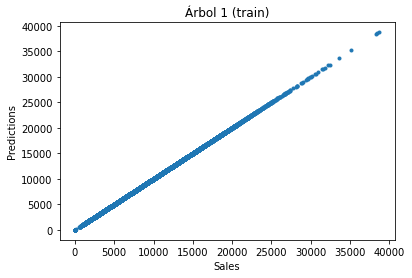

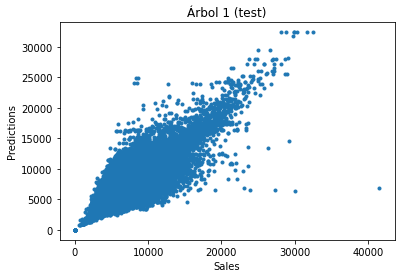

In [ ]:
plot_var_and_predictions(lineal_1, df_train, "Lineal 1 (train)", predictions="selfpredict")
plot_var_and_predictions(lineal_1, df_test, "Lineal 1 (test)")

plot_var_and_predictions(mpl_1, df_train, "Red neuronal 1 (train)", predictions="selfpredict")
plot_var_and_predictions(mpl_1, df_test, "Red neuronal 1 (test)")

plot_var_and_predictions(tree_1, df_train, "Árbol 1 (train)", predictions="selfpredict")
plot_var_and_predictions(tree_1, df_test, "Árbol 1 (test)")

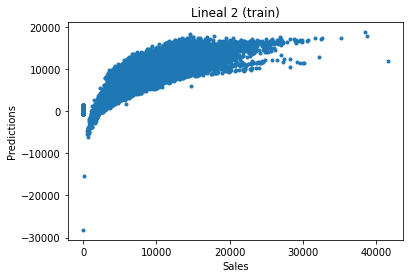

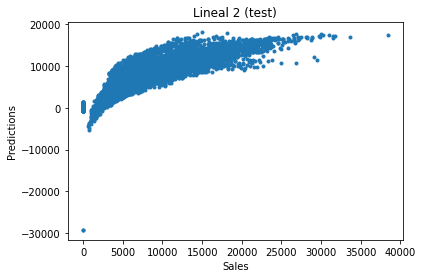

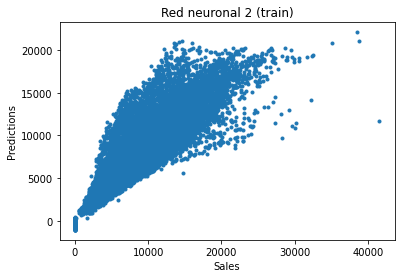

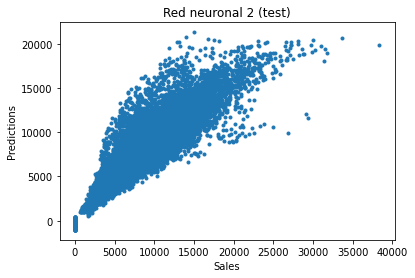

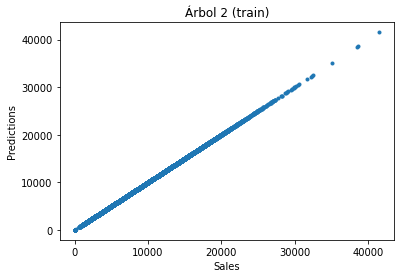

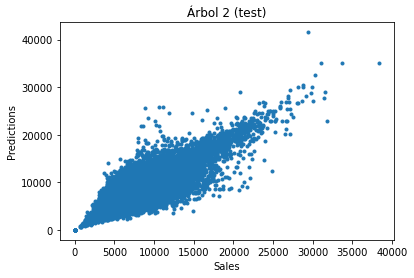

In [ ]:
plot_var_and_predictions(lineal_2, df_train_r, "Lineal 2 (train)", predictions="selfpredict")
plot_var_and_predictions(lineal_2, df_test_r, "Lineal 2 (test)")

plot_var_and_predictions(mpl_2, df_train_r, "Red neuronal 2 (train)", predictions="selfpredict")
plot_var_and_predictions(mpl_2, df_test_r, "Red neuronal 2 (test)")

plot_var_and_predictions(tree_2, df_train_r, "Árbol 2 (train)", predictions="selfpredict")
plot_var_and_predictions(tree_2, df_test_r, "Árbol 2 (test)")

Los modelos no parecieran estar generalizando correctamente, y el único que se podría considerar que tiene **overfitting** es el árbol de decisión, pero al mismo tiempo, generaliza casi igual de bien que una red neuronal con una muestra aleatoria. Ninguno de los modelos presenta **underfitting**.

## Utilizando transformación logarítmica para Sales

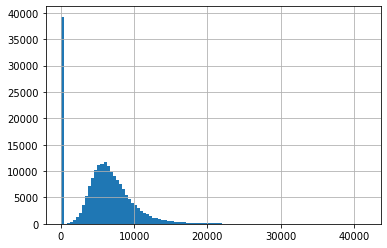

In [ ]:
df_master["Sales"].hist(bins=100)

In [ ]:
df_log = df_master.copy()
cond = df_log["Sales"] != 0 # Se expluyen los ceros porque se indefine el logaritmo
df_log.loc[cond, "Sales"] = np.log(df_log.loc[cond, "Sales"])

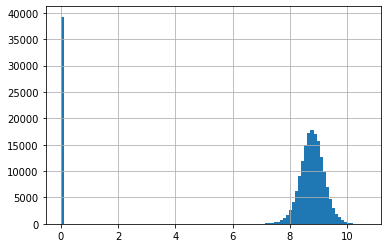

In [ ]:
df_log["Sales"].hist(bins=100)

El comportamiento del target Sales ahora tiene mayor similitud a una distribución normal

# Volvemos a ejecutar los modelos

## A: Con el tercio más **reciente**

In [ ]:
df_log_test = df_log.loc[:cut_33p].copy()
df_log_train = df_log.loc[(cut_33p+1):].copy()

col = ["Customers_log"]
df_log_train, df_log_test = escalar(df_log_train, df_log_test, col) #normalizamos la variable

### Lineal, con log

In [ ]:
lineal_3 = train_and_test_model(LinearRegression, df_log_train, df_log_test)

El error cuadrático medio es: 0.03564697498471146


### Red neuronal, con log

In [ ]:
mpl_3 = train_and_test_model(MLPRegressor, df_log_train, df_log_test, max_iter=1000)

El error cuadrático medio es: 0.3932236802992673


### Árbol de decisión, con log

In [ ]:
tree_3 = train_and_test_model(DecisionTreeRegressor, df_log_train, df_log_test)

El error cuadrático medio es: 0.04539058120042477


## B: Con muestra aleatoria

In [ ]:
df_log_train_r, df_log_test_r = train_test_split(df_log.copy(), test_size=1/3)

col = ["Customers_log"]
df_log_train_r, df_log_test_r = escalar(df_log_train_r, df_log_test_r, col) #normalizar

### Lineal, con log, muestra aleatoria

In [ ]:
lineal_4 = train_and_test_model(LinearRegression, df_log_train_r, df_log_test_r)

El error cuadrático medio es: 0.03307224452329478


### Red neuronal, con log, muestra aleatoria

In [ ]:
mpl_4 = train_and_test_model(MLPRegressor, df_log_train_r, df_log_test_r, max_iter=1000)

El error cuadrático medio es: 0.5579015995149411


### Árbol de decisión, con log, muestra aleatoria

In [ ]:
tree_4 = train_and_test_model(DecisionTreeRegressor, df_log_train_r, df_log_test_r)

El error cuadrático medio es: 0.03306766013514028


# Comentarios 2



Resultados sin aplicar logaritmo a Sales

Regresor|MSE reciente |MSE aleatorio
-|-|-
Lineal|2.386.095,07|2.221.572,29
Red neuronal|2.311.584,81|1.874.196,45
Árbol de decisión|2.548.050,28|1.959.871,26

Resultados aplicando logaritmo a Sales

Regresor|MSE reciente |MSE aleatorio
-|:-:|:-:
Lineal|0,04|0,03
Red neuronal|0,39|0,56
Árbol de decisión|0,05|0,03

Se puede notar que el rendimiento de los modelos en términos del error cuadrático medio mejora considerablemente por varios ordenes de magnitud. Esto a priori pareciera ser un buen indicador y corroborar la hipótesis planteada en el análisis preliminar de los datos, dado que al graficar se logra notar una tendencia lognormal en la variable sales. Pero también es importante notar que al aplicar logaritmo los números disminuyen, por lo tanto es natural que los errores sean mas chicos dado que están en otra escala.


Repitamos el proceso que hicimos antes para ver qué tal se ajustan las predicciones. En este caso debemos aplicar exponencial, dado que se aplicó logaritmo en el target.

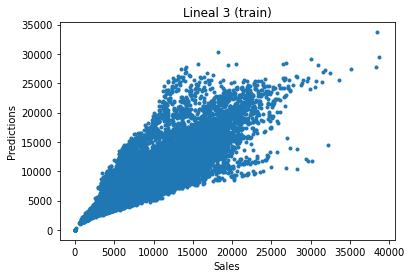

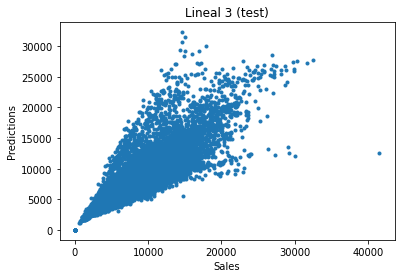

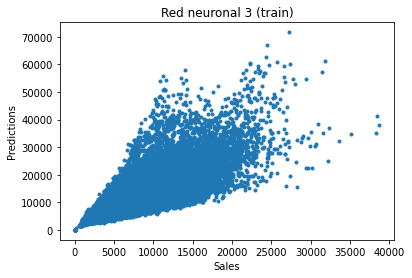

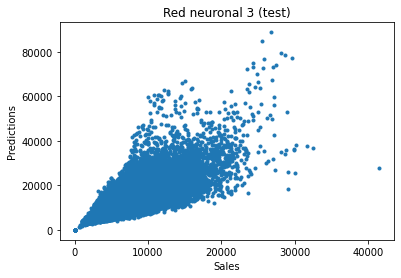

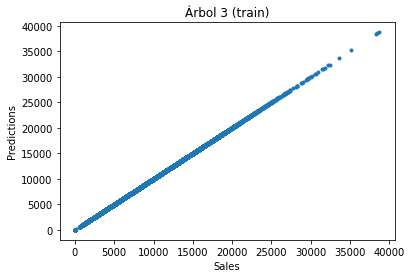

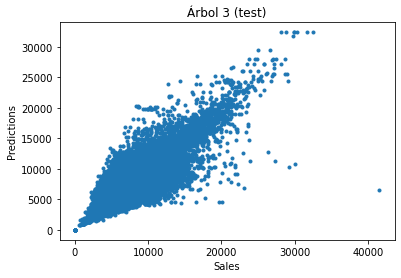

In [ ]:
# Con tercio más reciente

plot_var_and_predictions(lineal_3, df_log_train, "Lineal 3 (train)", predictions="selfpredict", use_exp=True)
plot_var_and_predictions(lineal_3, df_log_test, "Lineal 3 (test)", use_exp=True)

plot_var_and_predictions(mpl_3, df_log_train, "Red neuronal 3 (train)", predictions="selfpredict", use_exp=True)
plot_var_and_predictions(mpl_3, df_log_test, "Red neuronal 3 (test)", use_exp=True)

plot_var_and_predictions(tree_3, df_log_train, "Árbol 3 (train)", predictions="selfpredict", use_exp=True)
plot_var_and_predictions(tree_3, df_log_test, "Árbol 3 (test)", use_exp=True)

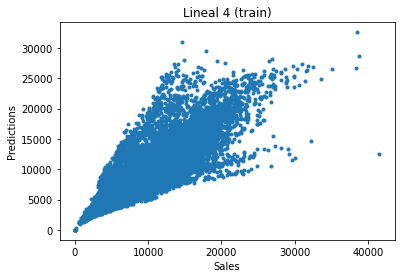

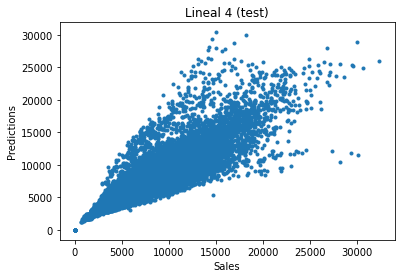

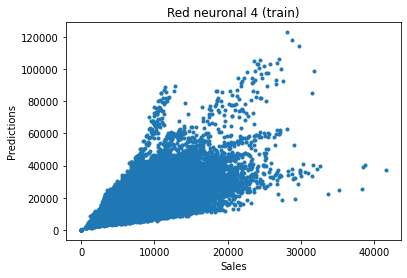

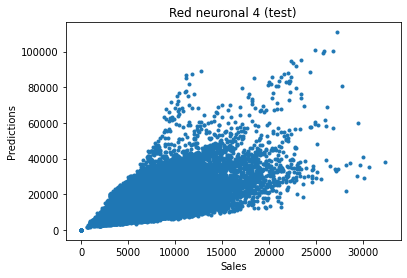

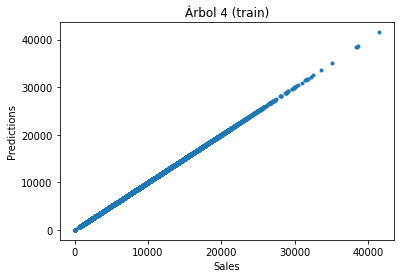

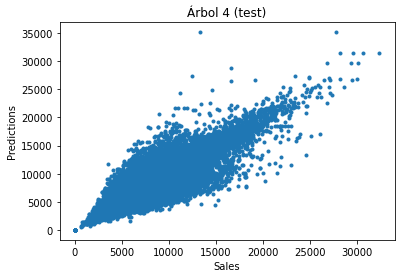

In [ ]:
# Con tercio aleatorio

plot_var_and_predictions(lineal_4, df_log_train_r, "Lineal 4 (train)", predictions="selfpredict", use_exp=True)
plot_var_and_predictions(lineal_4, df_log_test_r, "Lineal 4 (test)", use_exp=True)

plot_var_and_predictions(mpl_4, df_log_train_r, "Red neuronal 4 (train)", predictions="selfpredict", use_exp=True)
plot_var_and_predictions(mpl_4, df_log_test_r, "Red neuronal 4 (test)", use_exp=True)

plot_var_and_predictions(tree_4, df_log_train_r, "Árbol 4 (train)", predictions="selfpredict", use_exp=True)
plot_var_and_predictions(tree_4, df_log_test_r, "Árbol 4 (test)", use_exp=True)

El hecho de que el MSE sea menor es porque los datos al estar en escala logarítmica son mucho más chicos. Al pasarlos de nuevo a escala lineal y graficarlos nos damos cuenta de que el comportamiento es similar al caso anterior. Además, en base al análisis planteado se puede concluir que lo que mejor funciona es el árbol de decisión.